In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# theta --> heading angle, delta --> steering angle

v = np.random.randint(5, 15)
L = 2.0  # wheelbase
dt = 0.1
steps = 30
mean = 0
std_dev = np.radians(5)  # std given in degrees converted to radians
num_paths = 1

max_delta = mean + np.radians(40)
min_delta = mean -np.radians(40)

In [16]:
def bicycle_model(x, y, theta, v, delta, L, dt):
    x_next = x + v * np.cos(theta) * dt
    y_next = y + v * np.sin(theta) * dt
    theta_next = theta + (v / L) * np.tan(delta) * dt
    return x_next, y_next, theta_next

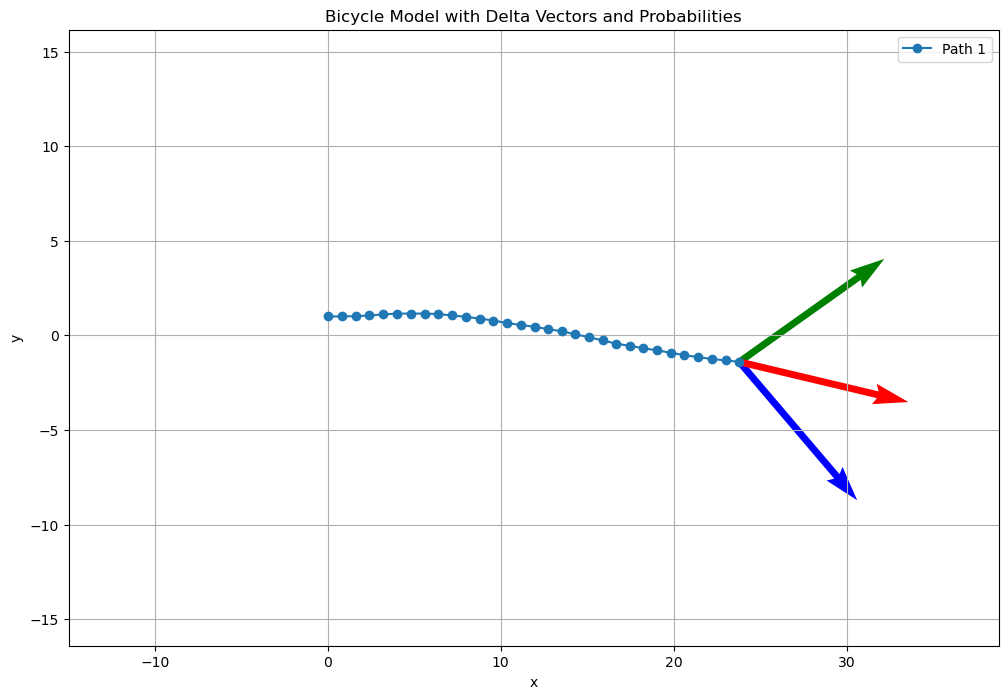

Mean Squared Error of Predicted Deltas: 0.0129


In [17]:
predicted_deltas = []
actual_deltas = []
delta_changes = []

plt.figure(figsize=(12, 8))

for path in range(num_paths):
    x, y, theta = 0, np.random.randint(-100, 100), 0
    x_arr = [x]
    y_arr = [y]

    for i in range(steps):
        delta = np.random.normal(mean, std_dev)
        actual_deltas.append(delta)
        x, y, theta = bicycle_model(x, y, theta, v, delta, L, dt)
        x_arr.append(x)
        y_arr.append(y)
        # mean = delta

        next_delta = np.random.normal(mean, std_dev)
        next_delta = np.clip(next_delta, min_delta, max_delta)
        predicted_deltas.append(next_delta)

        if i > 0:
            delta_change = next_delta - actual_deltas[-2]
        else:
            delta_change = next_delta - delta
        delta_changes.append(delta_change)

        scale_factor = 2.0
        x_max = x + scale_factor * np.cos(theta + max_delta)
        y_max = y + scale_factor * np.sin(theta + max_delta)
        x_min = x + scale_factor * np.cos(theta + min_delta)
        y_min = y + scale_factor * np.sin(theta + min_delta)
        x_pred = x + scale_factor * np.cos(theta + next_delta)
        y_pred = y + scale_factor * np.sin(theta + next_delta)

    plt.quiver(x, y, x_max - x, y_max - y, color='g', angles='xy', scale_units='xy', scale=0.2,
               label='Max Δ' if i == 0 else "")
    plt.quiver(x, y, x_min - x, y_min - y, color='b', angles='xy', scale_units='xy', scale=0.2,
               label='Min Δ' if i == 0 else "")
    plt.quiver(x, y, x_pred - x, y_pred - y, color='r', angles='xy', scale_units='xy', scale=0.2,
               label='Predicted Δ' if i == 0 else "")

    prob_density = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((next_delta - mean) / std_dev) ** 2)
    scaled_prob_density = prob_density / (1 / (std_dev * np.sqrt(2 * np.pi)))

    plt.plot(x_arr, y_arr, label=f'Path {path + 1}', marker='o')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bicycle Model with Delta Vectors and Probabilities')
plt.legend(loc='best')
plt.grid(True)

plt.xlim(-15, max(x_arr) + 15)
plt.ylim(min(y_arr) - 15, max(y_arr) + 15)

plt.show()

mse = np.mean((np.array(predicted_deltas) - np.array(actual_deltas)) ** 2)
print(f"Mean Squared Error of Predicted Deltas: {mse:.4f}")

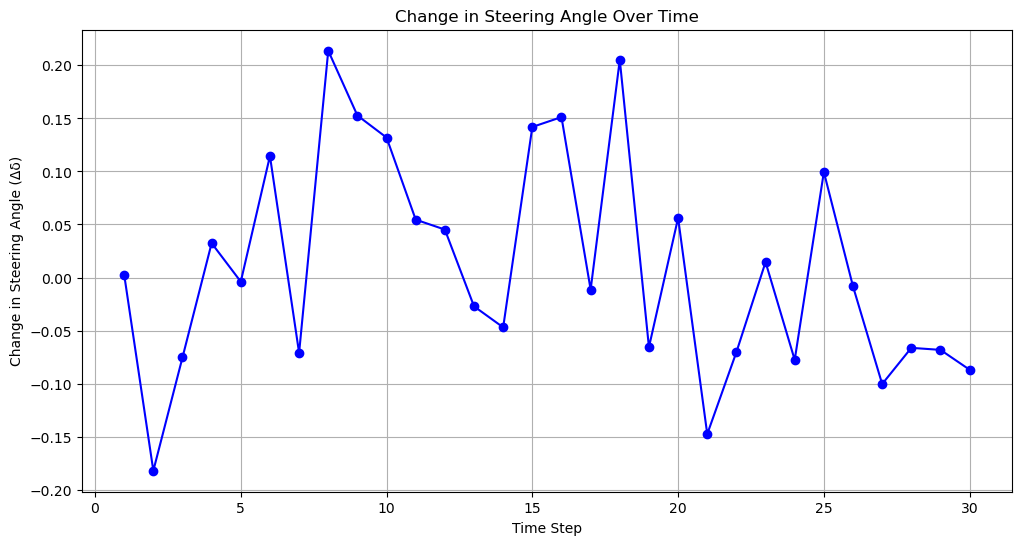

In [18]:
plt.figure(figsize=(12, 6))
time_steps = list(range(1, steps + 1)) 

plt.plot(time_steps, delta_changes, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Change in Steering Angle (Δδ)')
plt.title('Change in Steering Angle Over Time')
plt.grid(True)
plt.show()